<a href="https://colab.research.google.com/github/rishabhshah13/Adversarial_Patch_XAI590/blob/main/Assignment%204/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Interpretable ML II
## Rishabh Shah

In [11]:
# pip install imodels lime shap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# 1. Import Libraries and Load Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imodels import RuleFitClassifier, SlipperClassifier, BoostedRulesClassifier
import lime
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import imodels
from imodels import SLIMClassifier, OneRClassifier, BoostedRulesClassifier, FIGSClassifier, HSTreeClassifierCV
from imodels import SLIMRegressor, BayesianRuleListClassifier, RuleFitRegressor, GreedyRuleListClassifier
from imodels.discretization import ExtraBasicDiscretizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Load your dataset
# Example: df = pd.read_csv('path_to_dataset.csv')
# dataset_url = 'your_dataset_url_or_path'

from imodels import get_clean_dataset, HSTreeClassifierCV # import any imodels model here

# prepare data (a sample clinical dataset)
X, y, feature_names = get_clean_dataset('heart')


feature_names = feature_names[:20]
X = X[:40,:20]
y = y[:40]
# Create a DataFrame from X
df = pd.DataFrame(X,columns=feature_names)

# Add y as a new column named 'target'
df['target'] = y

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fetching heart from imodels


,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13_-1.0,att_13_0.5,att_13_1.0,target
0,0.708333,1.0,1.000000,-0.320755,-0.105023,0.0,1.0,-0.419847,0.0,-0.225806,0.0,1.000000,1.0,0.0,0.0,1
1,0.583333,0.0,0.333333,-0.603774,1.000000,0.0,1.0,0.358779,0.0,-0.483871,0.0,-1.000000,0.0,0.0,1.0,0
2,0.166667,1.0,-0.333333,-0.433962,-0.383562,0.0,0.0,0.068702,0.0,-0.903226,0.0,-1.000000,0.0,0.0,1.0,1
3,0.458333,1.0,1.000000,-0.358491,-0.374429,0.0,0.0,-0.480916,1.0,-0.935484,0.0,-0.333333,0.0,0.0,1.0,0
4,0.875000,0.0,-0.333333,-0.509434,-0.347032,0.0,1.0,-0.236641,1.0,-0.935484,0.0,-0.333333,1.0,0.0,0.0,0


In [14]:
# 2. Data Cleaning and Processing
# Check for missing values
print(df.isnull().sum())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['target']))


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['target'], test_size=0.2, random_state=42)


att_1          0
att_2          0
att_3          0
att_4          0
att_5          0
att_6          0
att_7          0
att_8          0
att_9          0
att_10         0
att_11         0
att_12         0
att_13_-1.0    0
att_13_0.5     0
att_13_1.0     0
target         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


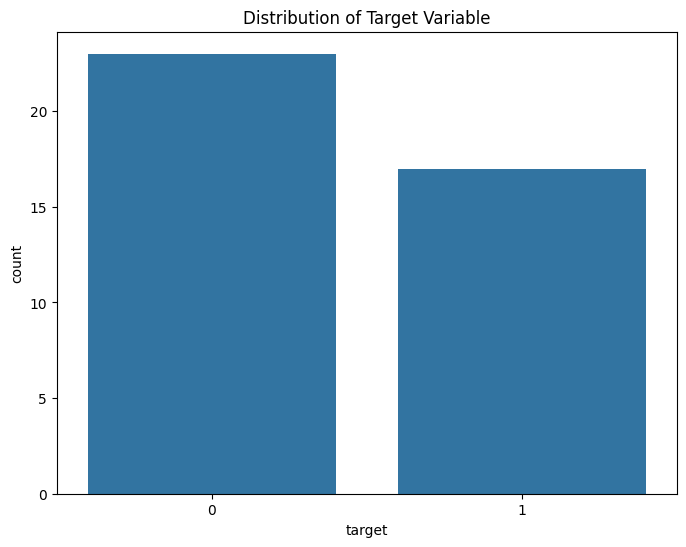

In [15]:
# 3. Data Visualization
# Visualize the distribution of the target variable
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


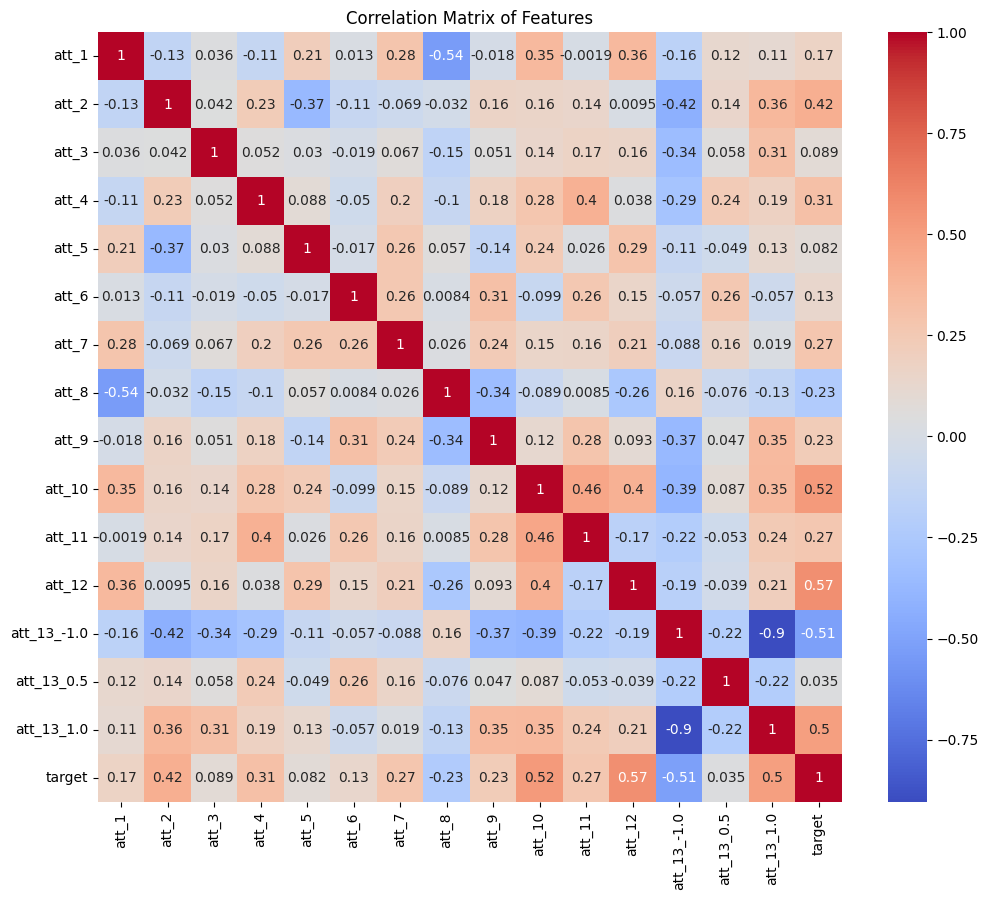

In [16]:
# Visualize correlations between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFit Important Rules:
                                                                   rule  coef
12                                                                  X12 -0.13
14                                                                  X14  0.51
24                                     X11 <= 0.96398 and X9 <= 0.73784 -0.46
19                                     X11 <= 0.96398 and X4 > -0.72596 -1.01
23                   X11 <= 0.96398 and X2 > -0.75473 and X3 <= 0.89533 -0.59
30                                                        X9 > -0.43191  0.03
27                     X1 > -0.5039 and X4 > -0.44857 and X7 > -1.95813  0.05
18                                    X11 <= -0.17011 and X9 <= 1.18774 -0.32
36                                      X2 > -1.25789 and X9 > -0.43191  0.10
26                                      X0 <= 0.7484 and X12 <= 0.05006  0.57
15                                     X2 > -0.75473 and X9 <= -0.43191 -0.09
17                   X11 <= -0.17011 an

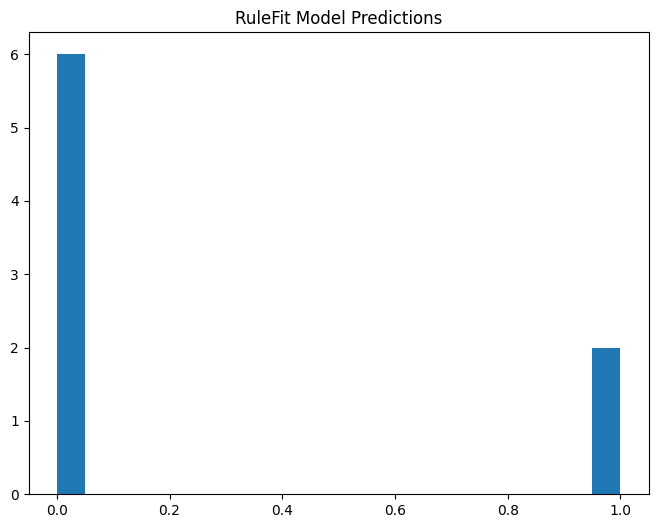

In [17]:
# 4. RuleFit Model
# Initialize and train the RuleFit model
rulefit = RuleFitClassifier()
rulefit.fit(X_train, y_train)

# Make predictions and evaluate the RuleFit model
rulefit_preds = rulefit.predict(X_test)

# Display important rules
print("RuleFit Important Rules:")
print(rulefit.visualize())

# Visualize RuleFit results
plt.figure(figsize=(8,6))
plt.title('RuleFit Model Predictions')
plt.hist(rulefit_preds, bins=20)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


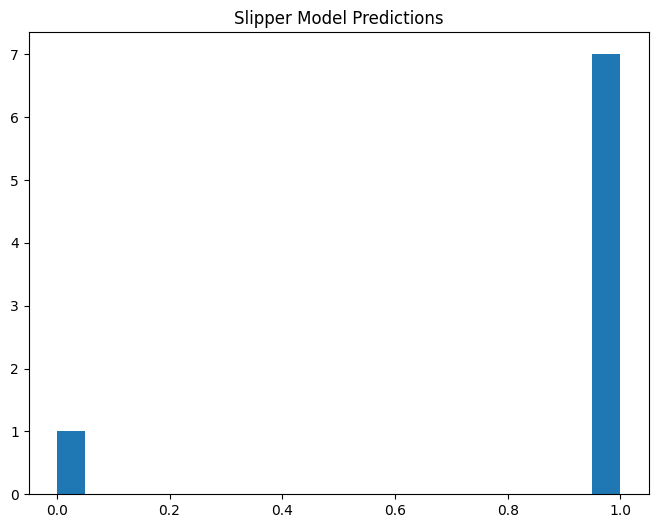

In [18]:

# 5. Slipper Model
# Initialize and train the Slipper model
slipper = SlipperClassifier()
slipper.fit(X_train, y_train)

# Make predictions and evaluate the Slipper model
slipper_preds = slipper.predict(X_test)

# Visualize Slipper model results
plt.figure(figsize=(8,6))
plt.title('Slipper Model Predictions')
plt.hist(slipper_preds, bins=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


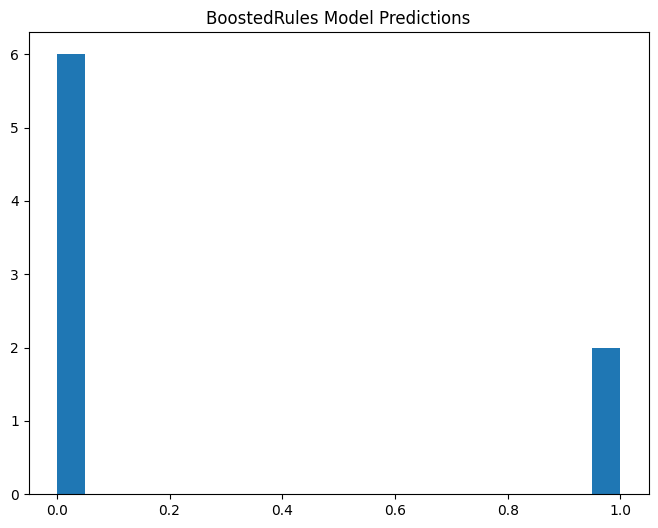

In [19]:
# 6. BoostedRules Model
# Initialize and train the BoostedRules model
boosted = BoostedRulesClassifier()
boosted.fit(X_train, y_train)

# Make predictions and evaluate the BoostedRules model
boosted_preds = boosted.predict(X_test)

# Visualize BoostedRules results
plt.figure(figsize=(8,6))
plt.title('BoostedRules Model Predictions')
plt.hist(boosted_preds, bins=20)
plt.show()

In [28]:
import numpy as np
from scipy.io.arff import loadarff
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import os

# path_to_current_file = os.path.dirname(os.path.abspath(__file__))


def viz_classification_preds(probs, y_test):
    '''look at prediction breakdown
    '''
    plt.subplot(121)
    plt.hist(probs[:, 1][y_test == 0], label='Class 0')
    plt.hist(probs[:, 1][y_test == 1], label='Class 1', alpha=0.8)
    plt.ylabel('Count')
    plt.xlabel('Predicted probability of class 1')
    plt.legend()

    plt.subplot(122)
    preds = np.argmax(probs, axis=1)
    plt.title('ROC curve')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot(fpr, tpr)
    plt.tight_layout()
    plt.show()


def get_ames_data():
    try:
        housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')
    except:
        housing = fetch_openml(name="house_prices", as_frame=True)

    housing_target = housing['target'].values
    housing_data_numeric = housing['data'].select_dtypes('number').drop(columns=['Id']).dropna(axis=1)
    feature_names = housing_data_numeric.columns.values
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        housing_data_numeric.values, housing_target, test_size=0.75)
    return X_train_reg, X_test_reg, y_train_reg, y_test_reg, feature_names


def get_diabetes_data():
    '''load (classification) data on diabetes
    '''
    data = loadarff(os.path.join(path_to_current_file, "../tests/test_data/diabetes.arff"))
    data_np = np.array(list(map(lambda x: np.array(list(x)), data[0])))
    X = data_np[:, :-1].astype('float32')
    y_text = data_np[:, -1].astype('str')
    y = (y_text == 'tested_positive').astype(int)  # labels 0-1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)  # split
    feature_names = ["#Pregnant", "Glucose concentration test", "Blood pressure(mmHg)",
                     "Triceps skin fold thickness(mm)",
                     "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)"]
    return X_train, X_test, y_train, y_test, feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


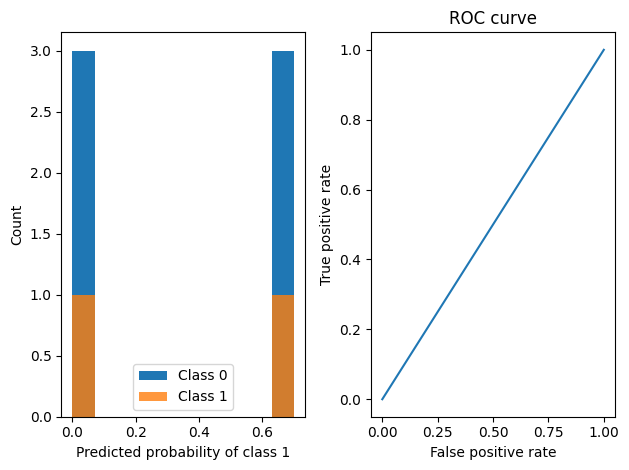

GreedyRuleListClassifier()

In [29]:
# fit a greedy rule list
m = GreedyRuleListClassifier()
m.fit(X_train, y=y_train, feature_names=feature_names)  # stores into m.rules_
probs = m.predict_proba(X_test)

# look at prediction breakdown
viz_classification_preds(probs, y_test)

m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Intercept 0.6289377550699943
Prediction_local [0.95944532]
Right: 0.9984169179940752


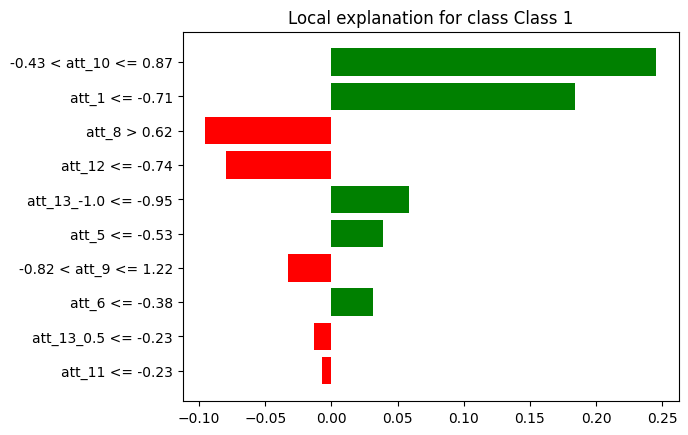

In [20]:
# 7. Model Interpretability with LIME
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=df.columns[:-1], class_names=['Class 0', 'Class 1'], verbose=True, mode='classification')

# Explain a single prediction from RuleFit model
exp = explainer.explain_instance(X_test[0], rulefit.predict_proba)
exp.show_in_notebook()

# Visualize LIME explanations
exp.as_pyplot_figure()
plt.show()

In [21]:

# # 8. Model Interpretability with SHAP
# # Initialize SHAP explainer
# explainer_shap = shap.Explainer(rulefit, X_train)

# # Compute SHAP values for test data
# shap_values = explainer_shap(X_test)

# # Plot SHAP summary plot
# shap.summary_plot(shap_values, X_test)

# # Visualize SHAP feature importance
# shap.plots.bar(shap_values)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: > ------------------------------
> RuleFit:
> 	Predictions are made by summing the coefficients of each rule
> ------------------------------
                                                               rule  coef
                                                                X12 -0.13
                                                                X14  0.51
                                   X11 <= 0.96398 and X9 <= 0.73784 -0.46
                                   X11 <= 0.96398 and X4 > -0.72596 -1.01
                 X11 <= 0.96398 and X2 > -0.75473 and X3 <= 0.89533 -0.59
                                                      X9 > -0.43191  0.03
                   X1 > -0.5039 and X4 > -0.44857 and X7 > -1.95813  0.05
                                  X11 <= -0.17011 and X9 <= 1.18774 -0.32
                                    X2 > -1.25789 and X9 > -0.43191  0.10
                                    X0 <= 0.7484 and X12 <= 0.05006  0.57
                                   X2 > -0.75473 and X9 <= -0.43191 -0.09
                 X11 <= -0.17011 and X2 > -0.75473 and X7 > -0.7266 -0.04
               X10 <= 2.06474 and X11 <= -0.17011 and X2 > -0.75473 -2.72
                  X0 <= 0.80244 and X14 > 0.05006 and X7 > -1.09606  3.49
                                  X11 <= 0.96398 and X9 <= -0.70185 -2.14
                                     X0 > 0.20804 and X9 <= 1.23273 -3.27
                                   X11 > -0.17011 and X9 > -0.70185  1.74
                                    X0 <= 0.69436 and X9 > -0.43191  0.61
                                   X11 > -0.17011 and X9 > -0.65686  2.41
                                   X7 <= -0.18473 and X9 > -0.70185  1.48
                                    X11 <= 0.96398 and X7 > 0.50493 -1.40
X0 <= 0.80244 and X4 > -0.95226 and X7 <= 0.50493 and X9 > -0.61187  1.22
                  X0 <= 0.26207 and X14 > 0.05006 and X4 > -0.97415  0.53
                                                      X11 > 0.96398  0.17


In [30]:
# 9. Conclusion and Summary
# Print out final results
print("RuleFit Model Accuracy:", rulefit.score(X_test, y_test))
print("Slipper Model Accuracy:", slipper.score(X_test, y_test))
print("BoostedRules Model Accuracy:", boosted.score(X_test, y_test))

# Summarize SHAP and LIME results
print("SHAP and LIME results indicate key features for model interpretability.")


RuleFit Model Accuracy: 0.75
Slipper Model Accuracy: 0.375
BoostedRules Model Accuracy: 0.75
SHAP and LIME results indicate key features for model interpretability.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
